<a href="https://colab.research.google.com/github/jacobymon/Instagram_analytics_tutorial/blob/main/Instagram_Analytics_CS123_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instagram Analytics Tutorial
Devanshi Guglani, Jacoby Lockman, Bryce Tu Chi

Audience: `Social Media Managers` / `Influencers` / `Business Account Owners`

Use case: `How-To`

Difficulty: `Intermediate` Assumes users understand how to use Python and basic web dev concepts.

Time Required: '45 minutes'

Knowledge Required:
* Python basics, Python data handling (variables, functions, lists, datatypes, dictionaries, lambda functions)
* How Python libraries work (installation and imports)
* Modifying, slicing Python strings
* HTML syntax
* JavaScript syntax including how to write basic Javascript functions
* Navigation of Instagram Business accounts and Facebook pages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#For reviewers

**High-level goal and outline**

Dear reviewers, this tutorials aims to teach users how to obtain and work with data obtained from Instagram in an insightful manner. Below is an outline of our project:

*   Retrieve your data
*   Basic Data Handling through Followers Demographics
*   Advanced Data Analysis through Comments & Sentiment Analysis
*   Access your information quickly and safely through Instagram Graph API

In order to perform some aspects of the tutorial you will need to retrieve data from your own account. If you are not comfortable with doing that, [here is a link](https://drive.google.com/drive/folders/1AbDusrvvQ7TdOr8ND-38xc01gMG5Idb6?usp=sharing) to some sample data you can use for Part 1.


# **Part 0: Retrieve Your Data**
Follow the following two steps to retrieve your data from Instagram:



1.   This [video](https://drive.google.com/drive/u/0/folders/1_emI81fCPyu_cvW8aTy-3b6fREDvKTDX) will also shed insight on what this tutorial is about, and what you will gain from it! It will also teach you how to actually get your data from Instagram... enjoy!
2.   For Part 2 of the tutorial, to extract comments from your instagram posts, please make sure you follow this [tutorial](https://exportcomments.com/resources/how-to-export-instagram-comments-to-excel/), and download your instagram comments data in .csv format.

Now, you are all set. Let's begin our Instagram Analytics journey!


# **Part 1: Who is Not Following Me Back?**

In this segment, you can parse through your followers and following Instagram data to retrieve key insights regarding your following base: who do you follow that doesn't follow you back? who are you not reciprocating followership?

To access your followers/following files, you will need to follow the pathway highlighted in Part 0 of this tutorial!

### **Importing libraries**

The data you download from Instagram is formatted as several JSON-files. To parse these, we will need the JSON library.


In [ ]:
import json

### Who am I following?

One of the files in our bundle from Instagram is called "followers_1.json", containing all your followers by their usernames. The JSON library will import this as a Dictionary due to how the JSON format is structured, but it's more useful for our case to just have a list. This list will be one of unique elements.

In [ ]:
#load followers file
with open('followers_1.json', 'r') as data_file:
    json_data = data_file.read()

#convert into a list of dictionaries
data = json.loads(json_data)
#create storage for username of followers
followers = []

#iterate through dictionaries
for count, val in enumerate(data):
    elem = val["string_list_data"][0]
    follower = elem["value"]
    followers.append(follower)

We also need the list of who you follow, which is contained in the "followings.json" file from Instagram. It is loaded in the exact same way, but due to some differences with the "followers_1.json" file, we need to specify the "relationships_following" parameter.

In [ ]:
#load followings file
with open('following.json', 'r') as data_file:
    json_data = data_file.read()

#convert into a list of dictionaries
data = json.loads(json_data)["relationships_following"]

#create storage for username of your followers
followings = []

for count, val in enumerate(data):
    elem = val["string_list_data"][0]
    following = elem["value"]
    followings.append(following)

Finally, the meat of the code. We here have two lists, each of which contain unique elements, and each of which may overlap with the other. There are many ways of doing this. The most straightforward solution would be to iterate over each list and check if the other contains the same element. In our case, we convert each list to sets, and use the & to find the intersection between two sets. To find who you don't follow back and who doesn't follow you back, we return the difference between the sets of "followings" and "followers".


In [ ]:
#both followed and following
intersection = list(set(followers) & set(followings))

#followers who you don't follow
followers_not_following = list(set(followers) - set(followings))

#people you follow who dont follow you back
following_not_followers = list(set(followings) - set(followers))


Then, the results are to be displayed.

In [ ]:
print(intersection)
# XS note: was print(union)
print(followers_not_following)
print(following_not_followers)

['trippy300303', 'thetablaplayer', 'trishag314', 'alej.cass', 'cindy.zxy', 'played_daft', 'g.karlcut', 'arshchhabra108', 'joeyzobel', 'jruan07', 'mellow_m1ke', 'jordanmeijers', 'riya.oliver9', 'hannahvestring', 'ranya_sharaf', 'aditichitre', 'nicdemello', 'simran.ksethi', 'simon_h_a', 'lebys_73', 'maya.claremontmckenna', 'abedy._', 'randyxchang', 'saramanso946', 'tara_malhotra_', 'n3ha_ravi', 'rxnees', 'gigiadiyia', 'ba_danggg', 'diyamehtaa_', 'gourii_v', 'addierogers', 'nora_chaynane', '_shainax', 'nadya.lengowski', 'gracehongg', 'shreyaa_o3', 't.furn', 'e.milychang', 'arlanyerby', 'sanah_218', 'mikaylaemann', 'olivialicataaa', 'tello.jellow', 'jeremyangsono', 'josef_gan', 'fansofabizer', 'aurore_pko', 'melvinriar', 'marco.valsania', 'nihal.shantigram', 'julial.hansen', 'valentina.adagio', 'laymanlouis', 'maddiesreid', 'emrysyamanishi', 'grace._.ryu', 'sylvana.poon', 'karltherealheel', 'ananyaa_lal', 'hello.kimmme', 'alexranganathan', '5c_wacm', 'quekhuixin', 'ddaniella101_', 'akaflyn

Et voila! You can now know who is a non-reciprocative, mutual, or one-sided follower and who is not!

# **Part 2: Instagram Comments Sentiment Analysis**

In this segment of our tutorial, we delve into the fascinating world of sentiment analysis, specifically tailored for Instagram content. Whether you're a business owner, a public figure, or an influencer, understanding the pulse of your audience is crucial. Our focus here is to unravel the expectations and reactions of your audience toward new projects or products, both before and after they hit the market.

Leveraging a dataset meticulously gathered from promotional posts on Instagram, this tutorial will guide you through the process of analyzing and interpreting the sentiments expressed in the comments section. These insights are invaluable for gauging public opinion and can significantly influence your marketing and product development strategies.

In this part of the tutorial, our case study centers around 'Power Plush,' a cosmetic product from the popular 'Kylie Cosmetics' line by Kylie Jenner. Using Python, we'll explore how to dissect and compare the public's anticipation and their actual responses post-launch. This hands-on approach will not only enhance your technical skills in sentiment analysis but also provide practical insights into consumer behavior and engagement in the dynamic world of social media marketing.





### **Step 1: Set Up the Environment**

In this **first section** of our tutorial on sentiment analysis of Instagram comments using Python, we'll set up our environment by installing necessary modules and importing essential libraries. Here's a breakdown of what each step accomplishes:

#### Installation of Modules

In [ ]:
# Install necessary Python modules
!pip install emoji
!pip install nltk
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00



1.  **emoji**: This module will help us handle and interpret emojis in the Instagram comments, as they can be a significant part of the sentiment expressed.
2.   **nltk (Natural Language Toolkit)**: A powerful Python library used for working with human language data (text). It provides easy-to-use interfaces to over 50 corpora and lexical resources.
3. **vaderSentiment**: This library is specifically designed for sentiment analysis. It's particularly good at handling sentiments expressed in social media texts.




#### Importing Libraries

In [ ]:
# Import essential Python libraries for data handling and analysis
import pandas as pd
import re
import matplotlib.pyplot as plt
import emoji
import nltk
import vaderSentiment

1. **pandas**: Used for data manipulation and analysis. It's particularly useful for handling structured data like the comments we'll analyze.
2. **re (Regular Expression)**: Helps in text processing. Useful for cleaning and filtering text data.
matplotlib: A plotting library for Python and its numerical mathematics extension, NumPy. We'll use it for visualizing our analysis results.
emoji: Imported to work with emojis in our data.
3. **nltk**: The Natural Language Toolkit, crucial for processing and analyzing human language data.
4. **vaderSentiment**: For conducting the actual sentiment analysis.

#### Preparing the NLTK Package

In [ ]:
# Prepare the NLTK package
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

This command downloads all the datasets and packages available in the nltk library. By doing this, you ensure access to all functions in the library without worrying about missing datasets.

#### Importing Specific Components

In [ ]:
# Import specific components from libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

1. **SentimentIntensityAnalyzer (from vaderSentiment)**: This is a key component of the vaderSentiment library, used to determine the sentiment of a piece of text (positive, negative, neutral).
2. **stopwords (from nltk.corpus)**: Commonly used words (like 'the', 'is', etc.) that are usually irrelevant in data analysis.
3. **word_tokenize (from nltk.tokenize)**: Used for breaking up strings into words and punctuation.
4. **WordNetLemmatizer (from nltk.stem)**: Reduces words to their base or root form (lemmatization).


This setup is the foundation for our sentiment analysis project. In the following sections, we'll dive into loading and preparing our Instagram comments dataset, followed by conducting the sentiment analysis using these tools.

###**Step 2: Load and Preprocess Data**

In this section of our tutorial, we'll focus on loading and preprocessing the Instagram comments data, which is crucial for our sentiment analysis. Let's walk through the steps and address the peer review comments for clarity and effectiveness.

#### Loading Data

In [ ]:
# Define URLs where the datasets are located
before_launch_url = "https://raw.githubusercontent.com/btuchi/kyliecosmetics_powerPlush/main/before_launch.csv"
after_launch_url = "https://raw.githubusercontent.com/btuchi/kyliecosmetics_powerPlush/main/after_launch.csv"

# Load the datasets from the URLs into pandas DataFrames
before_launch_data = pd.read_csv(before_launch_url)
after_launch_data = pd.read_csv(after_launch_url)



*   Here, we're defining URLs for two datasets: comments made before and after the launch of the Kylie Cosmetics product. These datasets are hosted online in CSV (Comma Separated Values) format.
*   The pd.read_csv function from the pandas library is used to load these CSV files into DataFrames, which are structured like tables and are very convenient for data manipulation.

Let's take a look what the original, unprocessed dataset look like, so we can have a genderal idea what information the dataset offers.

In [ ]:
# The data set before the product launched
before_launch_data.head()

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error
0,https://scontent.cdninstagram.com/v/t51.2885-1...,fabbeautyboss,https://www.instagram.com/fabbeautyboss,Love the packaging and shade range,1.0,0.0,2023-09-24T23:52:52.000Z,1.799544e+16,1.661885e+10,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
1,https://scontent.cdninstagram.com/v/t51.2885-1...,lauraribeiri,https://www.instagram.com/lauraribeiri,need this 😍,0.0,0.0,2023-09-24T23:47:26.000Z,1.797718e+16,2.963725e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
2,https://scontent.cdninstagram.com/v/t51.2885-1...,glowing.amber,https://www.instagram.com/glowing.amber,this concealer is my new fav 😍 I’m obsessed,0.0,0.0,2023-09-24T23:31:46.000Z,1.799408e+16,6.088183e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
3,https://scontent.cdninstagram.com/v/t51.2885-1...,theyluvblenn66,https://www.instagram.com/theyluvblenn66,We need those in Ethiopia💗💗,1.0,0.0,2023-09-26T09:24:47.000Z,1.810169e+16,4.733125e+10,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
4,https://scontent.cdninstagram.com/v/t51.2885-1...,iam.madriot,https://www.instagram.com/iam.madriot,💜💜💜,0.0,0.0,2023-09-25T07:22:37.000Z,1.820883e+16,3.083792e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN


In [ ]:
# The dataset after the product lanched
before_launch_data.head()

,profilePictureUrl,username,profileUrl,comment,likeCount,replyCount,commentDate,commentId,ownerId,timestamp,query,error
0,https://scontent.cdninstagram.com/v/t51.2885-1...,fabbeautyboss,https://www.instagram.com/fabbeautyboss,Love the packaging and shade range,1.0,0.0,2023-09-24T23:52:52.000Z,1.799544e+16,1.661885e+10,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
1,https://scontent.cdninstagram.com/v/t51.2885-1...,lauraribeiri,https://www.instagram.com/lauraribeiri,need this 😍,0.0,0.0,2023-09-24T23:47:26.000Z,1.797718e+16,2.963725e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
2,https://scontent.cdninstagram.com/v/t51.2885-1...,glowing.amber,https://www.instagram.com/glowing.amber,this concealer is my new fav 😍 I’m obsessed,0.0,0.0,2023-09-24T23:31:46.000Z,1.799408e+16,6.088183e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
3,https://scontent.cdninstagram.com/v/t51.2885-1...,theyluvblenn66,https://www.instagram.com/theyluvblenn66,We need those in Ethiopia💗💗,1.0,0.0,2023-09-26T09:24:47.000Z,1.810169e+16,4.733125e+10,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN
4,https://scontent.cdninstagram.com/v/t51.2885-1...,iam.madriot,https://www.instagram.com/iam.madriot,💜💜💜,0.0,0.0,2023-09-25T07:22:37.000Z,1.820883e+16,3.083792e+09,2023-11-14T21:23:03.972Z,https://www.instagram.com/p/Cxl9LkOP_Cn/?igshi...,NaN


#### Data Selection and Preview

In [ ]:
# Select relevant columns from the datasets
before_launch = before_launch_data[['commentDate', 'comment']]
after_launch = after_launch_data[['commentDate', 'comment']]

* We're selecting only two columns for
our analysis: commentDate and comment. This simplification helps focus on the essential data — when the comment was made and the comment text itself.

In [ ]:
# Display the first few rows of each dataset for preview
before_launch.head()

,commentDate,comment
0,2023-09-24T23:52:52.000Z,Love the packaging and shade range
1,2023-09-24T23:47:26.000Z,need this 😍
2,2023-09-24T23:31:46.000Z,this concealer is my new fav 😍 I’m obsessed
3,2023-09-26T09:24:47.000Z,We need those in Ethiopia💗💗
4,2023-09-25T07:22:37.000Z,💜💜💜


In [ ]:
after_launch.head()

,commentDate,comment
0,2023-10-23T00:43:43.000Z,Incredible formula
1,2023-10-23T08:44:10.000Z,This is such an amazing concealer! I'm OBSESSED 😍
2,2023-10-23T04:20:49.000Z,😍😍😍😍
3,2023-10-23T00:19:04.000Z,yesss so excited to try it out 🔥🔥🔥🔥🔥
4,2023-10-23T00:08:46.000Z,💗


* The head() function displays the first five entries of each DataFrame, giving us a glimpse of how the data looks.


#### Sorting by Comment Date/Time

In [ ]:
# Sort the comments by date to analyze them chronologically
before_launch = before_launch.sort_values('commentDate')
after_launch = after_launch.sort_values('commentDate')

* Sorting the data by commentDate is
crucial for chronological analysis. It helps in understanding the sentiment trend over time.
* This step rearranges the data in each DataFrame so that the earliest comments appear first, facilitating a time-based analysis.

Now let's check if the comments are sorted properly.

In [ ]:
# Let's take a quick look
# just to make sure all the comments are sorted by the date and time
before_launch

,commentDate,comment
278,2023-09-14T14:21:52.000Z,🥹😍😍
267,2023-09-14T14:22:40.000Z,Yessss can’t wait to try them out 🔥🔥🔥🔥
264,2023-09-14T14:24:21.000Z,YASSS I NEES TO TRY IT❤️❤️❤️
261,2023-09-14T14:24:25.000Z,Soooo what name are we going to give this conc...
269,2023-09-14T14:24:45.000Z,😍😍😍😍
...,...,...
76,2023-10-02T23:46:21.000Z,😂😂😂😂😂
349,2023-10-02T23:47:08.000Z,✨️🙏✨️
110,2023-10-02T23:48:52.000Z,🖤🤍
169,2023-10-08T08:49:11.000Z,Drugstore


In [ ]:
after_launch

,commentDate,comment
167,2023-09-27T21:57:44.000Z,😍😍😍
174,2023-09-27T21:58:26.000Z,I'm so proud of my girl @kyliejenner 💕
188,2023-09-27T21:59:03.000Z,Love these 🔥
194,2023-09-27T22:01:36.000Z,😍🩷
161,2023-09-27T22:04:52.000Z,So so so good 🥰🥰
...,...,...
322,2023-10-28T20:34:22.000Z,Kylie never comes up with anything. She’s know...
157,2023-11-07T23:36:55.000Z,When is it coming to Brazil? 😍
404,2023-11-08T00:14:01.000Z,👏
323,2023-11-10T16:00:53.000Z,why is everyone saying “By Mari Maria”??


### **Step 3: Textual Data Cleanup**

In this crucial step, we focus on cleaning and preprocessing the textual data we have extracted from Instagram comments. This process is essential for effective sentiment analysis as it transforms the raw text into a more analyzable form. Let's break down the code and address the question about the necessity of these preprocessing steps.

#### Text Preprocessing Function

The preprocess_text function is designed to clean and standardize the comments. For this part specifically, I am inspired by these two tutorials ([What do people think about your instagram?](https://medium.com/@weslleylc/what-do-people-think-about-your-instagram-a-simple-ml-application-for-sentiment-analysis-fbea1bab2c5c) and [NLTK Sentiment Analysis Tutorial for Beginners](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk))

I might not be able to discuss in detail about regular expressions. Please check them out if you want to learn more about how to use regular expressions to pre-process text data.


Here's what each part of the function does:

1. **Handling Empty Comments**: Checks if the comment is a string; if not (like NaN values), it returns an empty string or a placeholder.

2. **Emoji Conversion**: Converts emojis into their text representation using emoji.demojize, making it easier to analyze sentiment from text.

3. **URL and Username Handling**: Replaces URLs and usernames with placeholders 'URL' and 'AT_USER', respectively. This standardization removes specific user or website references while retaining the context of a web link or a mention.

4. **Whitespace Correction**: Converts multiple whitespaces into a single space for uniformity.

5. **Hashtag Handling**: Removes the '#' from hashtags, keeping only the topic word.

6. **HTML Tag Removal**: Strips off any HTML tags that might be present in the text.

7. **Tokenization**: Splits the text into individual words or tokens, a crucial step in text analysis.

8. **Stop Words Removal**: Filters out common words like 'the', 'is', etc., which are generally irrelevant in sentiment analysis.

9. **Lemmatization**: Reduces words to their base or root form, aiding in the standardization of the text.

10. **Rejoining and Lowercasing**: Converts the list of processed words back into a string and ensures all text is in lowercase for consistency.



In [ ]:
def preprocess_text(text):

    # handle empty comments!
    if not isinstance(text, str):
        return ""  # or some placeholder text like "No comment"
    # Convert emojis to text
    text = emoji.demojize(text)

    # Convert URLs to "URL"
    text = re.sub(r'http\S+|www.\S+', 'URL', text)

    # Convert @username to "AT_USER"
    text = re.sub(r'@\w+', 'AT_USER', text)

    # Correct multiple white spaces to a single white space
    text = re.sub(r'\s+', ' ', text)

    # Convert "#topic" to just "topic"
    text = re.sub(r'#', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Tokenize the text, splits the text into individual words.
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

     # Lemmatize the tokens, reduce the words to their base form
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    processed_text = processed_text.lower()
    return processed_text

#### Apply Preprocessing to the Data

In [ ]:
# Apply the preprocessing function to all comments
before_comments = before_launch['comment'].apply(preprocess_text)
after_comments = after_launch['comment'].apply(preprocess_text)

* The apply method is used to process each comment in the DataFrame using the preprocess_text function.

#### Inserting Cleaned Data

In [ ]:
# Insert cleaned comments into the original DataFrames
before_launch.insert(1, "cleaned_comments", before_comments)
after_launch.insert(1, "cleaned_comments", after_comments)

* This step adds a new column, cleaned_comments, to the DataFrames, containing the cleaned and processed text.

In [ ]:
# Let's see if it actually turns out as we expected!
before_launch

,commentDate,cleaned_comments,comment
278,2023-09-14T14:21:52.000Z,: face_holding_back_tears : :smiling_face_with...,🥹😍😍
267,2023-09-14T14:22:40.000Z,yessss ’ wait try : fire : :fire : :fire : :fi...,Yessss can’t wait to try them out 🔥🔥🔥🔥
264,2023-09-14T14:24:21.000Z,yasss i nees to try it : red_heart : :red_hear...,YASSS I NEES TO TRY IT❤️❤️❤️
261,2023-09-14T14:24:25.000Z,soooo name going give concealer : kissing_face...,Soooo what name are we going to give this conc...
269,2023-09-14T14:24:45.000Z,: smiling_face_with_heart-eyes : :smiling_face...,😍😍😍😍
...,...,...,...
76,2023-10-02T23:46:21.000Z,: face_with_tears_of_joy : :face_with_tears_of...,😂😂😂😂😂
349,2023-10-02T23:47:08.000Z,: sparkle : :folded_hands : :sparkles :,✨️🙏✨️
110,2023-10-02T23:48:52.000Z,: black_heart : :white_heart :,🖤🤍
169,2023-10-08T08:49:11.000Z,drugstore,Drugstore


#### Addressing the Question on Necessity of Preprocessing

Preprocessing steps like these are crucial in sentiment analysis for several reasons:

* **Standardization**: They convert varied forms of text into a more uniform format, making it easier for sentiment analysis algorithms to interpret.

* **Noise Reduction**: By removing irrelevant elements (like URLs, usernames, HTML tags), the analysis can focus on the meaningful content.

* **Efficiency**: Cleaning and standardizing text can significantly improve the efficiency and accuracy of the analysis.

In summary, while these preprocessing steps might seem extensive, they are integral to ensuring that the sentiment analysis is as accurate and insightful as possible. The cleaner and more standardized the text data, the better the sentiment analysis algorithms can perform.

### **Step 4: Performing Sentiment Analysis Using VADER**

In this step of our sentiment analysis tutorial, we will utilize the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer to assess the sentiment expressed in Instagram comments. VADER is particularly adept at handling social media text, including slang, emoticons, and other informal expressions.

#### Initializing the VADER Sentiment Analyzer

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

* First, we initialize the VADER sentiment analyzer. This tool is designed to analyze the 'polarity' of a text — whether the expressed opinion is positive, negative, or neutral.


#### Defining the Sentiment Scoring Function

In [ ]:
# Define a function to extract a more nuanced sentiment score
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    return compound_score

* We define a function get_sentiment that takes a piece of text as input and returns a sentiment score.
The function uses analyzer.
* polarity_scores to get a dictionary of scores in different categories (positive, negative, neutral, and compound).
* The compound score is a normalized, weighted composite score that takes into account the valence of the words in the text. It ranges from -1 (most negative) to +1 (most positive), providing a nuanced view of sentiment.

#### Applying the Function to the Comments

In [ ]:
# Apply the sentiment scoring function to the processed comments
sentiment_before = before_launch['cleaned_comments'].apply(get_sentiment)
sentiment_after = after_launch['cleaned_comments'].apply(get_sentiment)

* We then apply the get_sentiment function to the 'cleaned_comments' column in our DataFrames (before_launch and after_launch). This is done using the .apply() method, which applies the function to each element in the column.


#### Inserting Sentiment Scores into DataFrames

In [ ]:
# Insert the calculated sentiment scores into the original DataFrames
before_launch.loc[:, 'sentiment_score'] = sentiment_before
after_launch.loc[:, 'sentiment_score'] = sentiment_after

* Finally, we insert the calculated sentiment scores into our original DataFrames. We create a new column named sentiment_score in each DataFrame and populate it with the scores we computed.

Let's take a look on how everything looks so far:

In [ ]:
before_launch

,commentDate,cleaned_comments,comment,sentiment_score
278,2023-09-14T14:21:52.000Z,: face_holding_back_tears : :smiling_face_with...,🥹😍😍,0.0000
267,2023-09-14T14:22:40.000Z,yessss ’ wait try : fire : :fire : :fire : :fi...,Yessss can’t wait to try them out 🔥🔥🔥🔥,-0.8225
264,2023-09-14T14:24:21.000Z,yasss i nees to try it : red_heart : :red_hear...,YASSS I NEES TO TRY IT❤️❤️❤️,0.0000
261,2023-09-14T14:24:25.000Z,soooo name going give concealer : kissing_face...,Soooo what name are we going to give this conc...,0.0000
269,2023-09-14T14:24:45.000Z,: smiling_face_with_heart-eyes : :smiling_face...,😍😍😍😍,0.0000
...,...,...,...,...
76,2023-10-02T23:46:21.000Z,: face_with_tears_of_joy : :face_with_tears_of...,😂😂😂😂😂,0.0000
349,2023-10-02T23:47:08.000Z,: sparkle : :folded_hands : :sparkles :,✨️🙏✨️,0.6249
110,2023-10-02T23:48:52.000Z,: black_heart : :white_heart :,🖤🤍,0.0000
169,2023-10-08T08:49:11.000Z,drugstore,Drugstore,0.0000


In [ ]:
after_launch

,commentDate,cleaned_comments,comment,sentiment_score
167,2023-09-27T21:57:44.000Z,: smiling_face_with_heart-eyes : :smiling_face...,😍😍😍,0.0000
174,2023-09-27T21:58:26.000Z,i 'm proud girl at_user : two_hearts :,I'm so proud of my girl @kyliejenner 💕,0.4767
188,2023-09-27T21:59:03.000Z,love : fire :,Love these 🔥,0.4215
194,2023-09-27T22:01:36.000Z,: smiling_face_with_heart-eyes : :pink_heart :,😍🩷,0.0000
161,2023-09-27T22:04:52.000Z,so good : smiling_face_with_hearts : :smiling_...,So so so good 🥰🥰,0.4927
...,...,...,...,...
322,2023-10-28T20:34:22.000Z,kylie never come anything . she ’ known steal ...,Kylie never comes up with anything. She’s know...,-0.2263
157,2023-11-07T23:36:55.000Z,when coming brazil ? : smiling_face_with_heart...,When is it coming to Brazil? 😍,0.0000
404,2023-11-08T00:14:01.000Z,: clapping_hands :,👏,0.0000
323,2023-11-10T16:00:53.000Z,everyone saying “ by mari maria ” ? ?,why is everyone saying “By Mari Maria”??,0.0000


By the end of this step, you have effectively applied sentiment analysis to your Instagram comments data. The resulting sentiment scores provide insights into the overall sentiment of your audience, both before and after the launch of a product or service.

Remember, sentiment analysis is an iterative process. You might need to adjust your approach based on the results and the specific characteristics of your dataset. This step is crucial for understanding public perception and can guide future marketing and product development strategies.

### **Step 5: Visualizing Sentiment Scores**

In this step, we will visualize the sentiment scores of Instagram comments before and after the product launch. This visualization will help us understand whether people’s expectations were met, exceeded, or disappointed by the product. We will explore three types of visualizations: box plots, violin plots, and scatter plots, each providing unique insights.

#### Option 1: Box Plot

Box plots are excellent for showing the distribution of sentiment scores, highlighting the median, quartiles, and outliers.

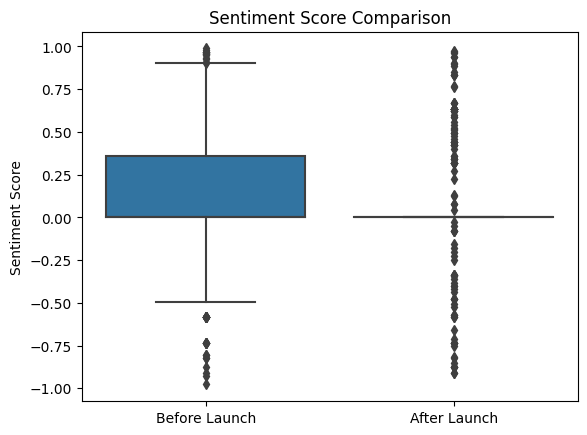

In [ ]:
# Importing seaborn for advanced visualization
import seaborn as sns

# Prepare data for box plot
data = [before_launch['sentiment_score'], after_launch['sentiment_score']]

# Creating a box plot
sns.boxplot(data=data)
plt.xticks([0, 1], ['Before Launch', 'After Launch'])
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Comparison')
plt.show()

* **Interpretation**: Look for differences in the median, range, and outliers between the two distributions. A lower median post-launch might suggest more negative reception than expected.


#### Option 2: Violin Plot

Violin plots combine aspects of box plots and density plots, offering a deeper view of the distribution.

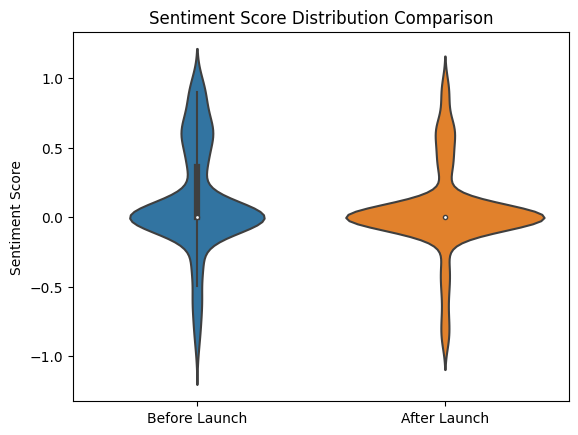

In [ ]:
# Creating a violin plot
sns.violinplot(data=data)
plt.xticks([0, 1], ['Before Launch', 'After Launch'])
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Distribution Comparison')
plt.show()

* **Interpretation**: These plots show the density of the scores. A wider section indicates a higher density of comments at that sentiment score.


#### Option 3: Scatter Plot

Scatter plots are great for visualizing individual data points and can reveal clustering patterns.

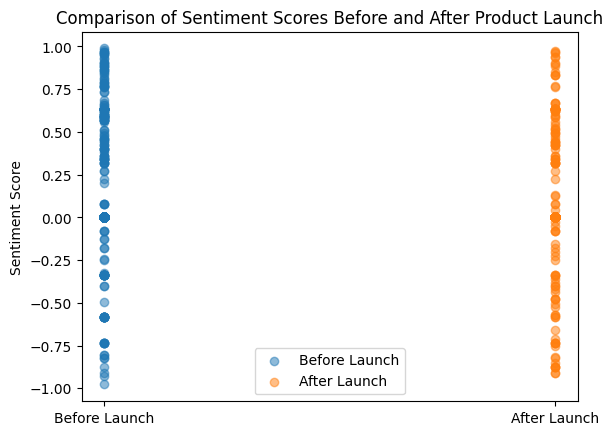

In [ ]:
# Create a figure and axis for scatter plot
fig, ax = plt.subplots()

# Assign x-coordinates for before and after launch
x_before = [1] * len(before_launch['sentiment_score'])
x_after = [2] * len(after_launch['sentiment_score'])

# Create scatter plot
ax.scatter(x_before, before_launch['sentiment_score'], alpha=0.5, label='Before Launch')
ax.scatter(x_after, after_launch['sentiment_score'], alpha=0.5, label='After Launch')

# Set x-axis ticks and labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Before Launch', 'After Launch'])

# Add labels and title
plt.ylabel('Sentiment Score')
plt.title('Comparison of Sentiment Scores Before and After Product Launch')

# Add a legend
plt.legend()

# Display the plot
plt.show()

* **Interpretation**: This visualization allows you to see each individual sentiment score. Patterns or clusters can indicate common sentiments among the comments.

#### Deciding on the Best Visualization

Each type of plot offers different insights:

* **Box Plots**: Best for a quick comparison of range and median.
* **Violin Plots**: Useful for understanding the density and distribution of the scores.
* **Scatter Plots**: Ideal for seeing individual scores and detecting clustering patterns.

The choice depends on what aspect of the sentiment you wish to emphasize. For a general comparison, box plots are straightforward. If you're interested in the distribution of sentiments, violin plots provide more detail. Scatter plots are excellent for a granular view of each score.



Visualizing data is a powerful way to convey complex information quickly and intuitively. In sentiment analysis, these visualizations can reveal patterns and insights that might not be immediately obvious from the raw data alone. Choose the type of plot that best suits your analytical goals and the story you want to tell with your data.

### **Harnessing Sentiment Analysis for Instagram Comments**

Congratulations on completing this tutorial on sentiment analysis of Instagram comments! Throughout this journey, you've learned how to set up your environment, preprocess text data, perform sentiment analysis using VADER, and visualize the results in various informative ways.

This tutorial equipped you with the skills to:

* **Install and Import Necessary Libraries**: You've learned to install essential Python libraries and understand their roles in text processing and sentiment analysis.

* **Load and Preprocess Data**: You've mastered techniques to clean and standardize text data, preparing it for effective analysis.

* **Perform Sentiment Analysis**: By using the VADER sentiment analyzer, you've gained insights into public opinion expressed in Instagram comments.

* **Visualize Results**: You've explored different methods to visually represent sentiment data, providing a clear and intuitive understanding of public sentiment.

Remember, sentiment analysis is a powerful tool that can be applied to various domains beyond Instagram comments. It can help businesses understand customer feedback, gauge public opinion, and inform marketing strategies. The skills you've acquired here are transferable and can be a valuable addition to your data analysis toolkit.

Continue to explore and refine these techniques to suit your specific needs. Data science is an ever-evolving field, and staying curious and adaptable is key to success. Happy analyzing!

# **Part 3: Using the Instagram Graph API**


**Disclaimer!!**
This section requires you to download code and run the code on your own code editor, run commands from your terminal, and open your own browser.

In this segment, we will scratch the surface of the power the Instagram Graph API has to quickly get data. This is valuable because we can call this API from our web browser and easily query live data without having to download anything. This is a rather complicated process because using the Graph API requires you to make calls from a Meta app. Thus we will start with becoming a Meta App developer.

Navigate to the following [website](https://business.facebook.com/business/loginpage/?next=https%3A%2F%2Fdevelopers.facebook.com%2F&app=436761779744620&login_options%5B0%5D=FB&login_options%5B1%5D=SSO&is_work_accounts=1)

Log in with your Facebook acount, or if you have Meta work account, and navigate to the button that says "create app"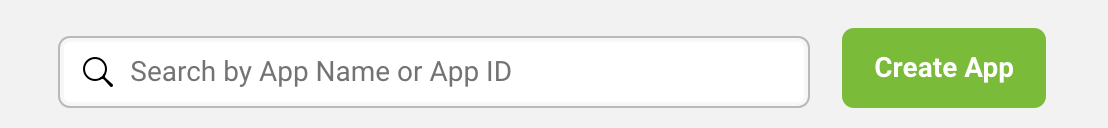

Then when prompted what you want your app to do, select "other", then select a "Business" 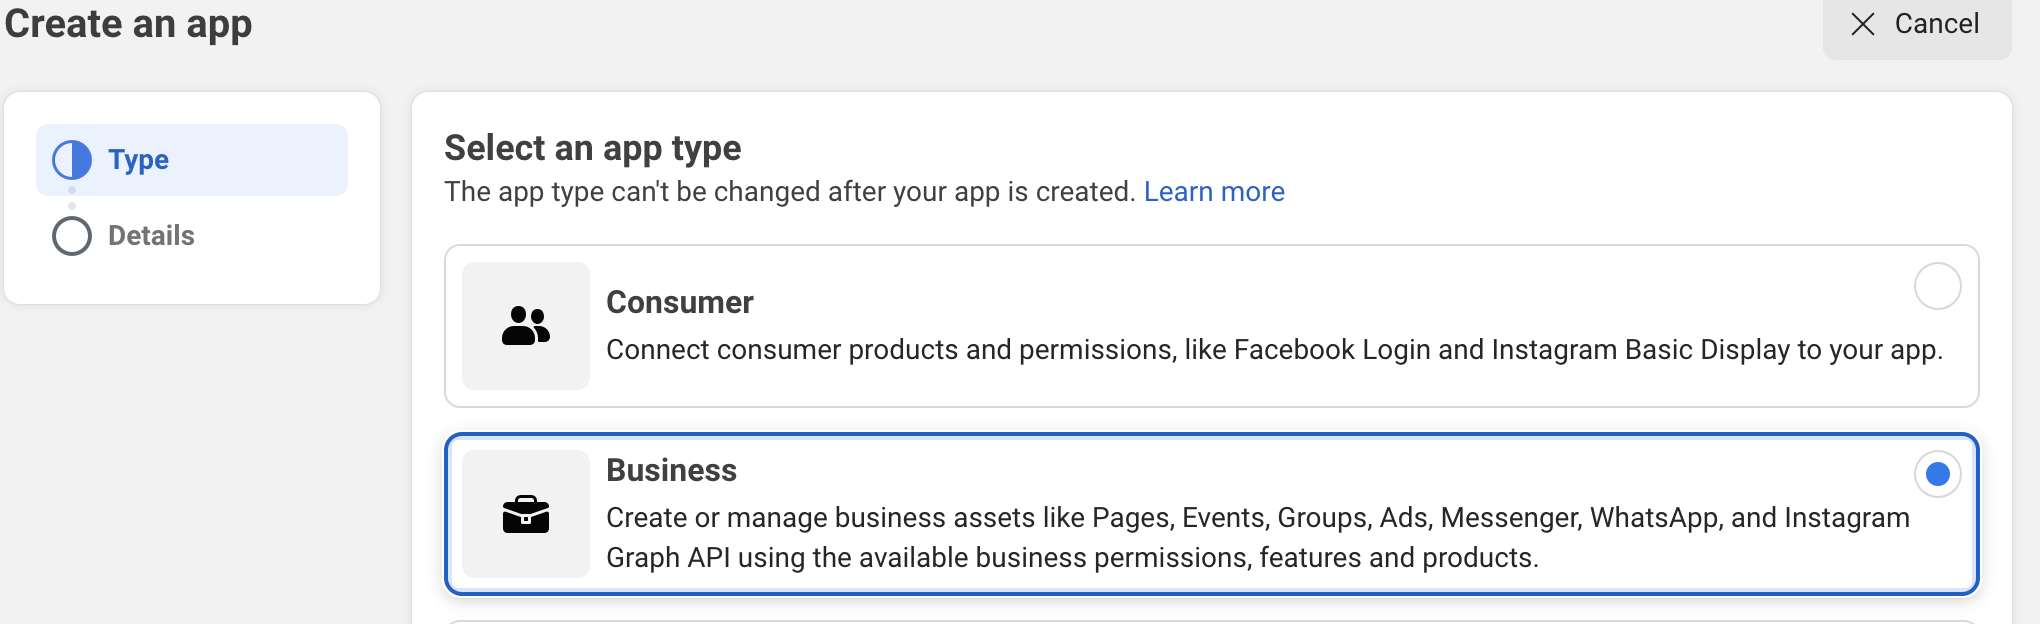 \\
Note that the type of app you choose is very important because it determines the information we have permission to request!

Click next, give your app a name, and make sure to select which business account is connected with the app so that we can have access to the necessary permissions.
Finally click "create app" and then select set up on the Instagram Graph API as well as the Facebook Login for Business.

  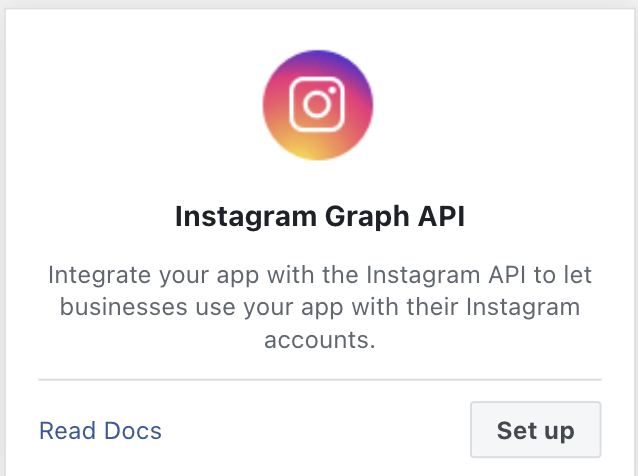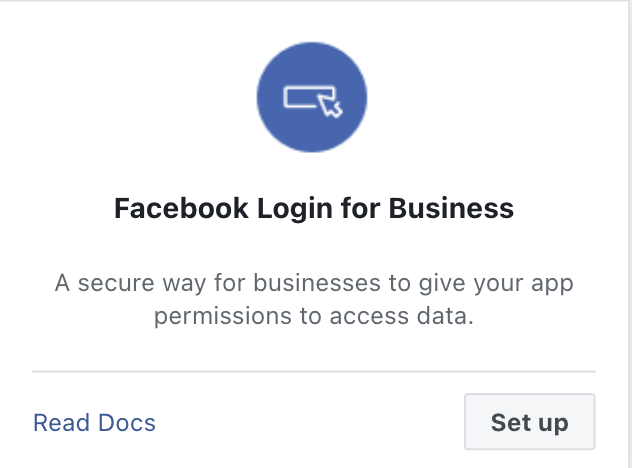
  
Congratulations! you are now a Meta app developer.
Now it is time to configure this app. This will require a url which we will use the [Flask](https://flask.palletsprojects.com/en/3.0.x/) web framework to create.


If you do not have Flask installed on you computer you can follow the intructions for a Mac or Windows OS on the first README of this [App_Template](https://drive.google.com/drive/folders/1oaTcTRgF_99Wp_1RBqdjbpUluR2CCXNE?usp=drive_link) folder. Please make a copy and store the folder in a directory you can easily access from your terminal. We recommend you take some time to BREIFLY familiarize yourself with all the READMEs and important files.

**Important!!!!!**
You will need to input your app ID (the current one is not yours) so that the SDK knows which app to work with in the `index.html` file. Your app ID number can be found at the top left of your Meta app dashboard.
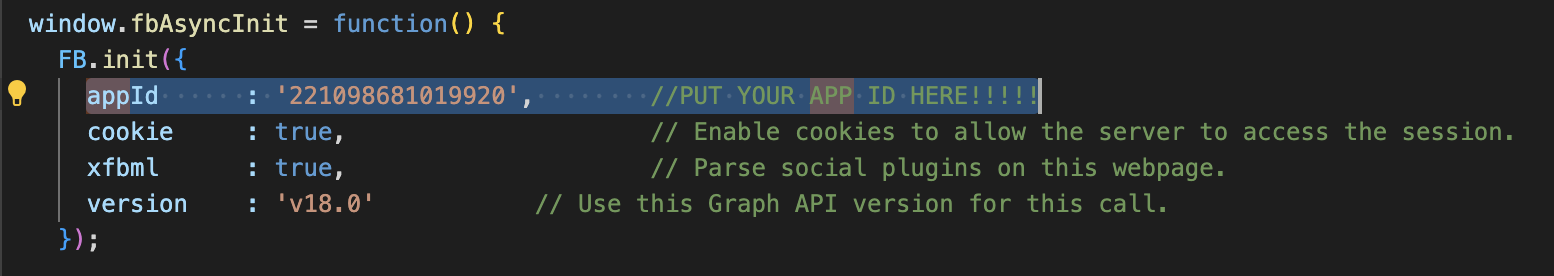

By now you should have followed the instruction on the first README and have a valit URL. Next, back on the basic settings of your app, scroll all the way to the bottom and click "+ add platform". Then select, "website" and then click next. Then, enter the URL that we used to run our Flask web application, https://127.0.0.1:8000/, as the site URL. Your browser should look like
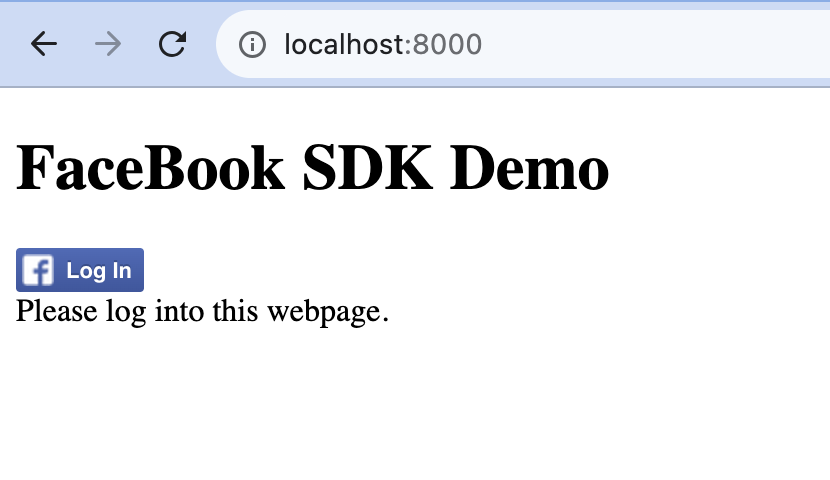

**Note** that you may get a message that the url is not secure. In this case click "advanced" and the proceed to the URL.

As of now, we have not set up the log in Product correctly. Navigate back to your Meta app dashboard and go to the Facebook Login for business and then settings.

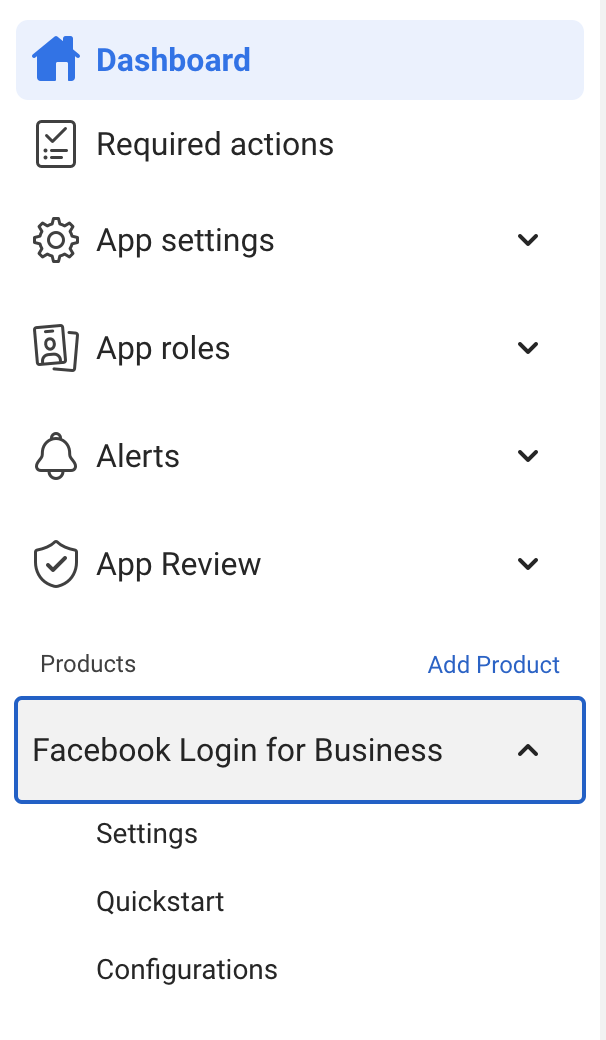

Make sure that the Login with Java Script SDK is toggled to "Yes".
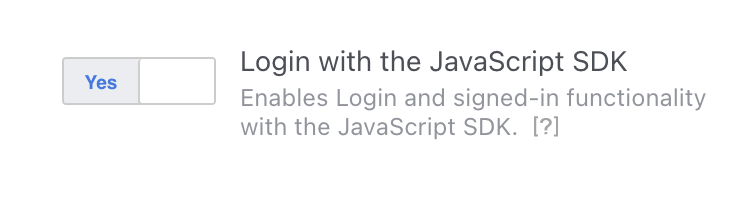

After clicking the "Log In" button you should be prompted to allow the app permission to recieve data from your account. Allow this information to be recieved. After succesfully logging in, you should see a a similar message to this. 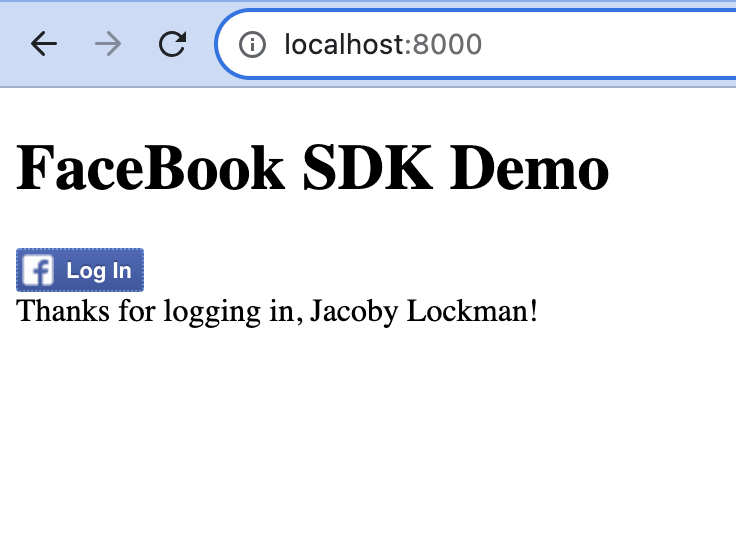

**Graph API Explorer** \\
As of now we have a way to call the Instagram Graph API from our browser. However, a helpful tool for exploring what data can be accessed from your app is the [Graph API Explorer](https://developers.facebook.com/tools/explorer/).
Be sure to check that your Meta app is the correct app and that you have generated an access token on the right hand side. Depending on the privacy setting of your Facebook account, your default query will vary in the information that is output.
Currently, we are limited to the information we have permission to request. As of now, "public_profile" and "email" are the only pieces of information we can recieve. This is the default permissions we are allowed. However, we can request other data that the user will have to grant us during their log in of the app.

**Permissions** \\
In order to perform practical analytics, we need to request the "pages_show_list", "instagram_basics", and "business_management" permissions. Do this by selecting these permissions in the Graph API Explorer in the bottom right. 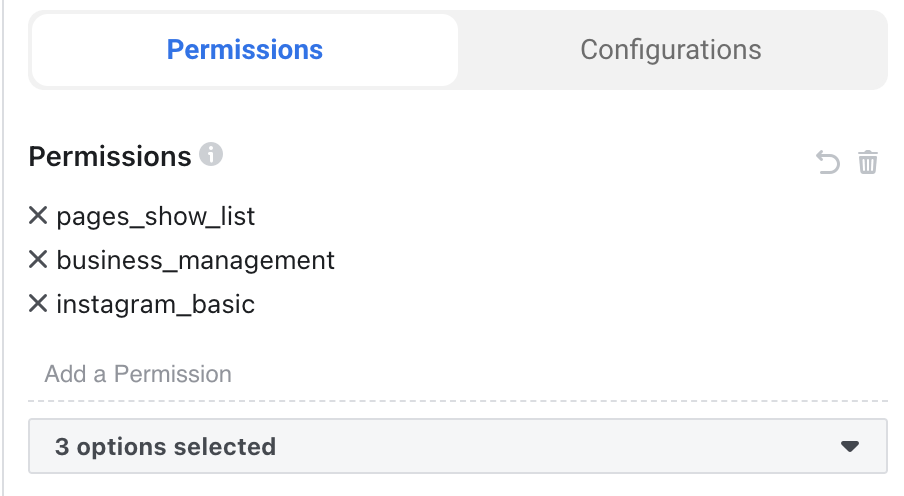

Then click generate access token. This will prompt you to select which pages you want your app to access. By allowing these permissions you are giving the app access to this data. When in doubt it's best to ask the least amount of permissions possible so that it doesn't invade unnecessary privacy if you intend to have other people use your app. For now, we will just be performing analytics on our own data.

Try the query "me/accounts" like so 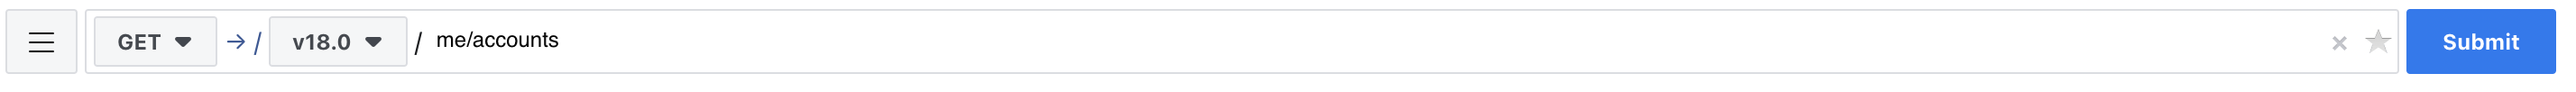

The result should show all of the pages that we can perform the MANAGE, CREATE_CONTENT, MODERATE, or ADVERTISE tasks on. Though, for the purpose of this tutorial we will perform more simpler tasks.

Since you have a business instagram account that is linked to a facebook page, you should be able to get some data that looks roughly like so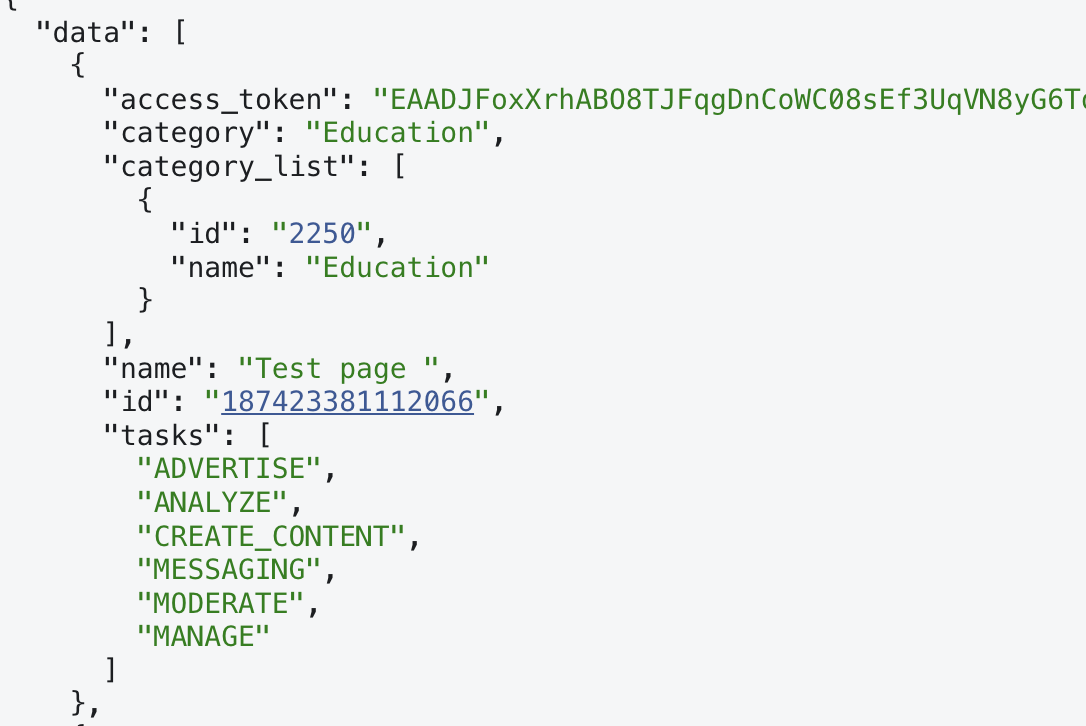

Notice the id for this test page is clickable. With the graph API, every object/node has some form of ID. The connections of these nodes allows us to jump around data to find what we would like. In this case, we want to select the id of a facebook page that is connected to the business instagram account that we want to perform api calls on. Thus we click on that id, 1887423371112066 in this case.

To show the connections of instagram business accounts to a page. click on that pages id, then perform the following query with your following instagram business accounts id of course.

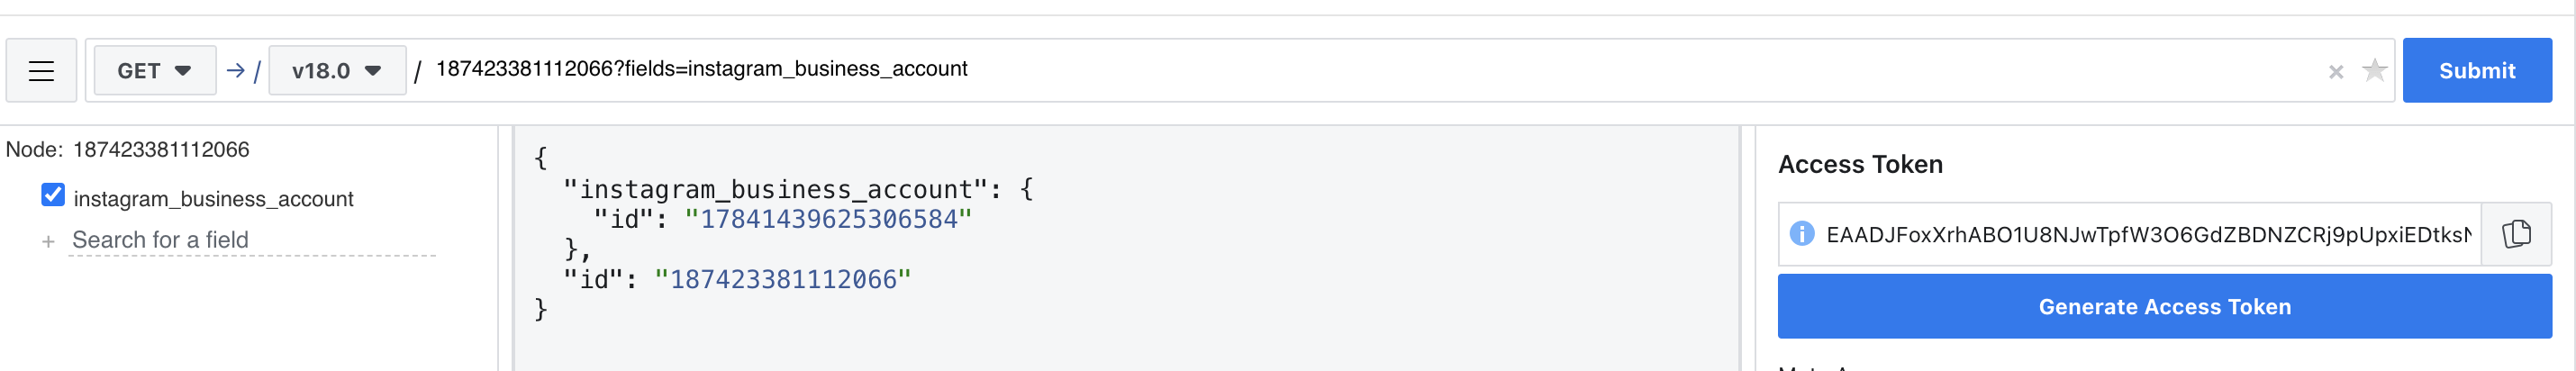

The inner data represents the business accounts connected to the Facebook Page whose id is on the outside. Note that if you do not have any business Instagram accounts linked to the Facebook page you are querying, you will end up with no inner data, and will have to select an Instagram business account to link with that Facebook page.

Now that we have the id or ids of the page's business instagram accounts, we can select the id of a business account to start performing queries on that account's data.

For simplicity, we will use the Instagram Graph API, 17841439625306584 in my case, to count the number of media on the Instagram account with the following query.

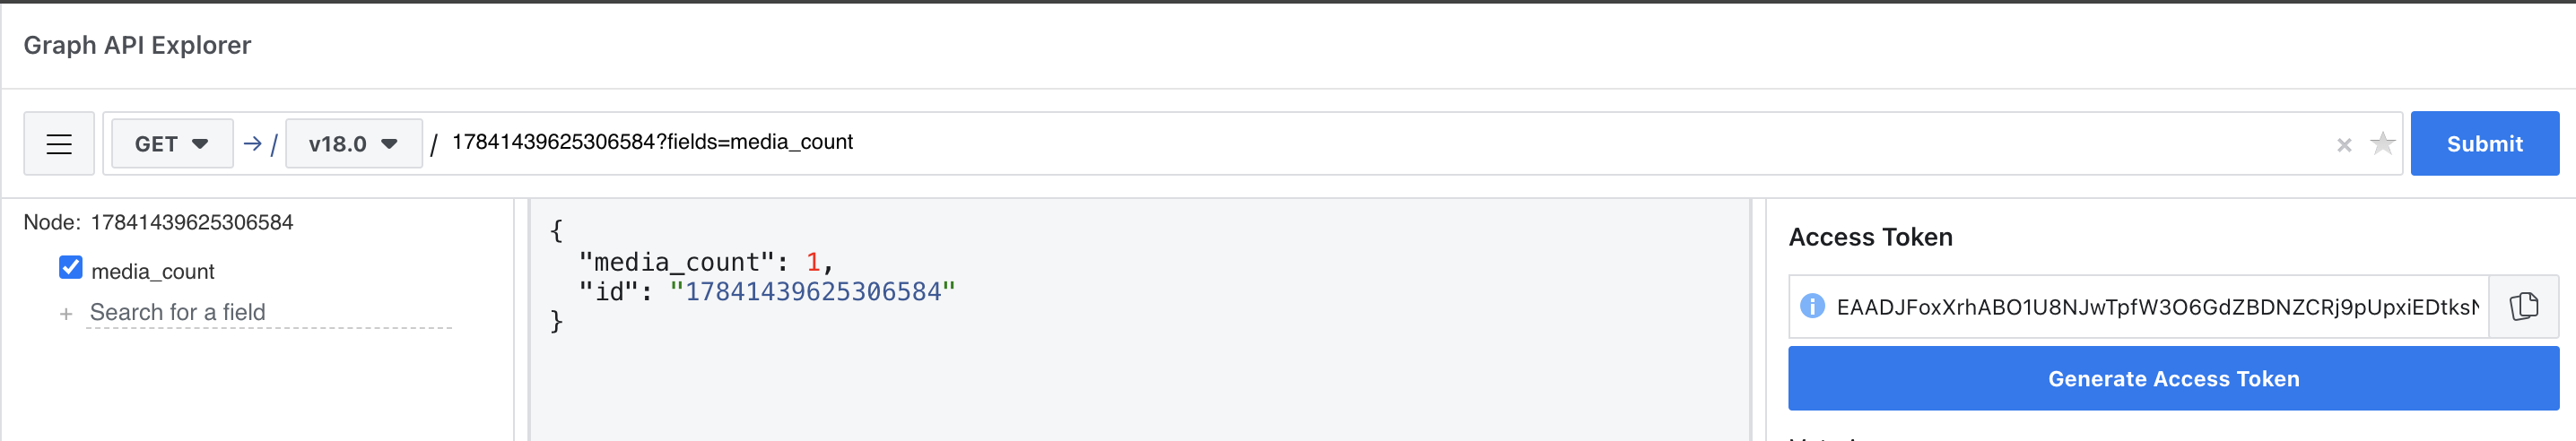

Excellent. We now have data using the Graph API Explorer. Now lets see if we can access this data from our browser.

At the bottom of the Graph API Explorer, there's a button called "get code". Click this and then make sure you are on Java Script SDK version. It should look like so. 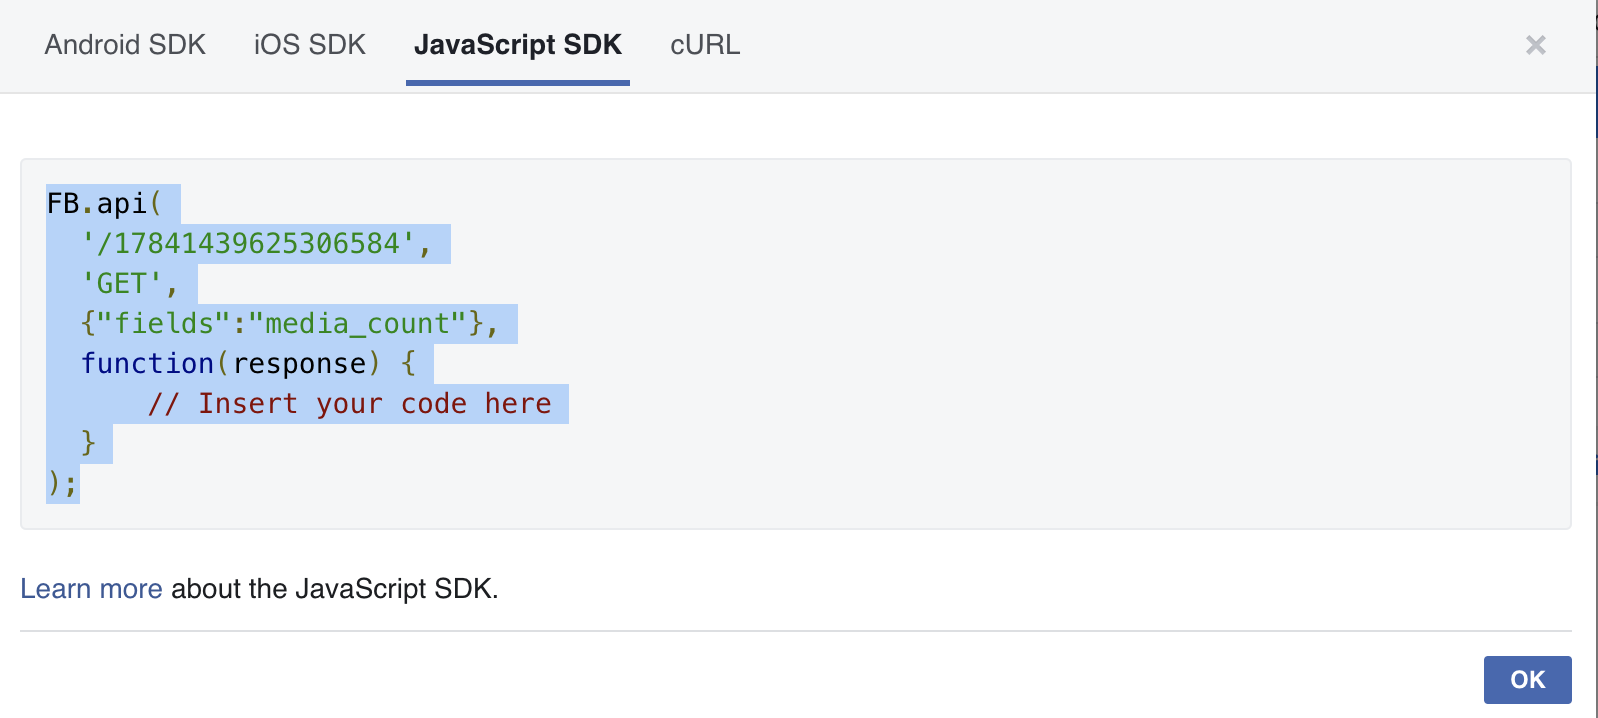

We can can call this code in a function to display data on the front end. Please paste the following snippet near the end of the

```
<script>
```
tags in the index.html file. Heres the function I put in. You are welcomed to copy and paste, but remember that you will have to change the id used in the query for your Instagram business account. Also note that the function names in this snippet are aligned with the other html code so it would be wiser and easier for you to name your corresponding function the same.


In [ ]:
function getMediaCount(){
    FB.api(
  '/17841439625306584',
  'GET',
  {"fields":"media_count"},
  function(response) {
      // Insert your code here
      console.log('media counts is ' + response.media_count)
      document.getElementById('media_count').innerHTML = 'The media count is ' + response.media_count

  }
);
}


SyntaxError: ignored

Additionally, we can perform the same process to get the name of this account.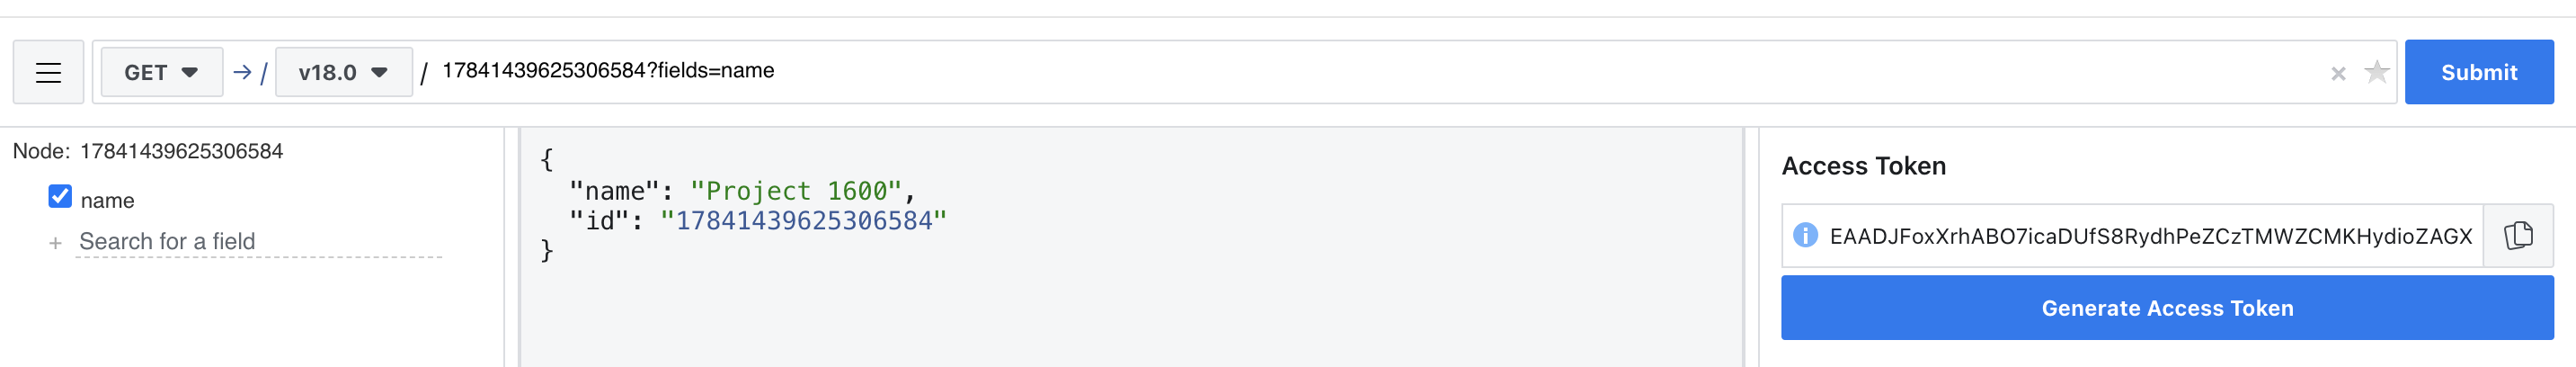

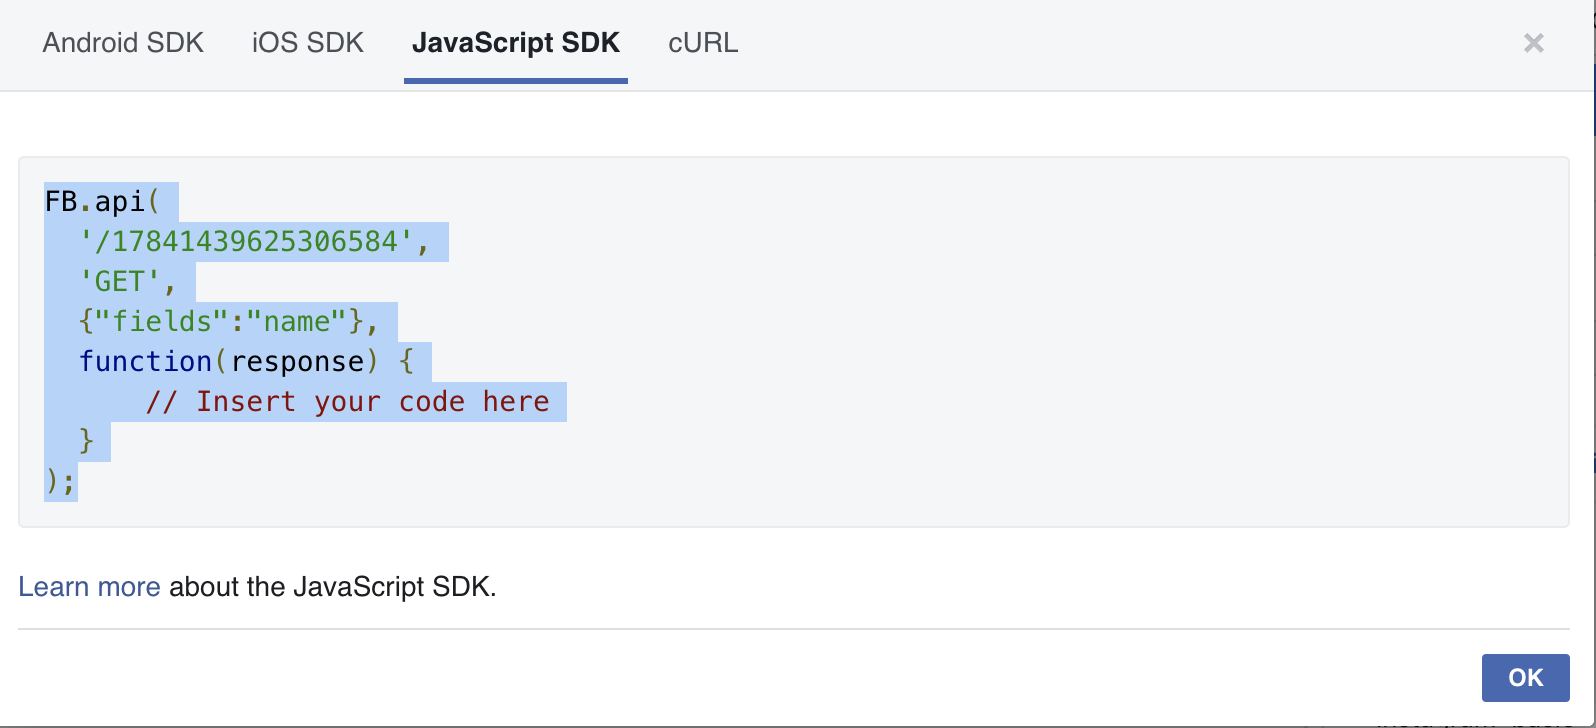

Here is the function I used for mine. The same cautions apply as in the previous explanation for getting the media count.

In [ ]:
function getAccountName(){
    FB.api(
  '/17841439625306584',
  'GET',
  {"fields":"name"},
  function(response) {
      // Insert your code here
      console.log(response.name)
      document.getElementById('account_name').innerHTML = 'for the Instagram account ' + response.name
  }
);

}


After doing so, log in to your app in the browser. You should get a result similar to this.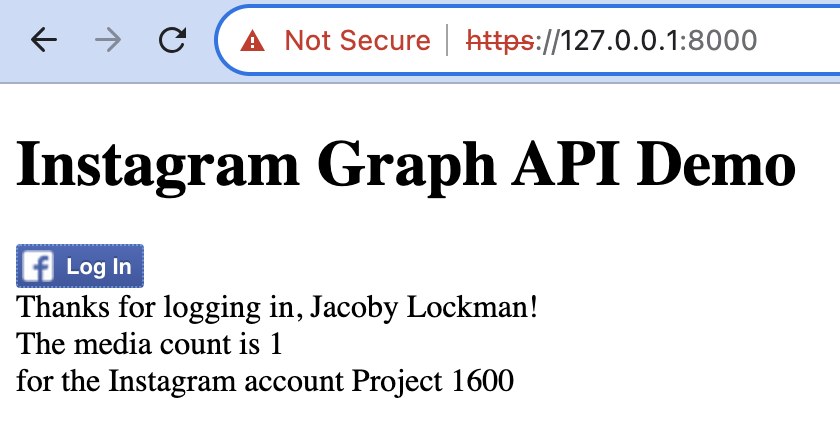


Yay! You have now succesfully used the Instagram Graph API to get data on your Instagram account. Of course, the Flask application allows you to take data from the front end and perform python functions on the backend. See the file pythonfunctions.py. Thus in combination with skills we learned from the parts 1 and 2 of the tutorial, we can call the Graph API to get live data quickly and perform analytics on them. Note that some of the queries you may want to do require additional advanced access [permissions](https://developers.facebook.com/docs/permissions/) as well as putting your app in live mode.

A huge thanks to the following people for making our code come to fruition: Nick Boyce for his [article](https://medium.com/@nickboyce/how-to-track-your-instagram-followers-over-time-with-google-sheets-scripts-bd9f5acf5ede) that inspired this project, Google Research's [Design Your Own Sentiment Analysis Colab](https://colab.research.google.com/github/littlecolumns/ds4j-), and Justin Stolpe for his Instagram API [playlist](https://www.youtube.com/watch?v=mVhvN_5GIuQ&list=PL0glhsZ01I-BAFwPmQBWMNqUDnkSlOR6r&index=5) on Youtube that helped us curate the API section of our tutorial.


And most of all, Professor Xanda for fostering the intellectual vitality and encouraging us to continue to push ourselves to do our best this semester.

Thank you so much and we hope you enjoyed this tutorial.
